<a href="https://colab.research.google.com/github/raveeshaanuruddha/BST/blob/main/Cifar_10_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import warnings
#warnings.filterwarnings("ignore")

import cv2 #OpenCv library in python;Computer vision Library;image processing
import numpy as np

import urllib.request #module ;provide tools for working with URLs(retreive data from web servers,downloading files,sending https requests)
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split #sklearn:scikit-learn library ; scikit-learn library is a powerful open-source(available for anyone to acess,use,modify,and distribute) Python library for machine learning.It provides tools for building and implementing a wide range of supervised and unsupervised machine learning models.
                                                     #The train_test_split function is used to split datasets into training and testing subsets


from keras.datasets import cifar10   #Keras is an open-source, high-level neural network library written in Python
                      #The keras.datasets module provides access to a collection of commonly used datasets in machine learning and deep learning

from tensorflow.keras.preprocessing.image import ImageDataGenerator #keras.Preprosessing.image is a module of Keras and ImageDataGenerator is a function for dataAugmntation
#from keras.preprocessing.image import load_img
#img=load:img("Path to image jpg3",target_size=(224,224))
#ImageDataGenerator;Provides real-time data augmentation, which is useful when training deep learning models on image data. This allows you to generate augmented images (like rotated, zoomed, or flipped images) on the fly to artificially increase the size of your dataset.

from keras.utils import to_categorical #The to_categorical function from keras.utils is used to convert class vectors (integers) into one-hot encoded vectors
                                       #In one-hot encoding, each class label is represented as a vector of zeros, with a 1 in the position corresponding to the class label.

from keras.models import Sequential #Keras provides two primary APIs for building models:

#Sequential API: For building models layer-by-layer.
#Functional API: For creating more complex models with shared layers or multiple inputs/outputs.
#Sequential: To create a sequential stack of layers.

from keras.layers import Dense,Conv2D,MaxPooling2D #Keras offers various layers for creating neural networks. Layers are added to models using these functions

#Dense layers: Dense()
#Convolutional layers: Conv2D(), Conv1D(), Conv3D()
#Pooling layers: MaxPooling2D(), AveragePooling2D()
#Dropout: Dropout()
#Recurrent layers: LSTM(), GRU(), SimpleRNN()
#Embedding layer: Embedding()

from keras.layers import Dropout,Flatten,BatchNormalization

from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
#Callbacks:Functions for monitoring and modifying training behavior:
#EarlyStopping: Stop training when performance stops improving.
#ModelCheckpoint: Save the model after every epoch.
#ReduceLROnPlateau: Reduce learning rate when a metric plateaus

from keras.models import load_model
#The load_model function allows you to load a previously saved model in Keras.


In [2]:
#The load_data() function in datasets like CIFAR-10 or others (e.g., MNIST) is a utility provided by libraries like TensorFlow/Keras. works:
#The function first checks if the dataset is available locally on your machine.
#If it's not available, it downloads the dataset from a predefined online source (like a server hosted by TensorFlow).
#Extract the Dataset:
#Prepare the Dataset:
#Once the data is available, the function loads it into memory, often as NumPy arrays.
#The dataset is pre-split into training and testing sets to save you the hassle of doing it manually.

#For images, the dataset is organized as:
#Features (X): Images represented as multidimensional arrays (height, width, channels).
#Labels (y): Class labels, often stored as integers
#The function outputs two tuples: (X_train, y_train) and (X_test, y_test).

(X_train,y_train),(X_test,y_test)=cifar10.load_data()



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 26s 0us/step


In [3]:
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2,random_state=0)
#It is commonly used to create a validation set from the training data so that you can evaluate the performance of a model during training without using the test data

In [4]:
print('Train Images Shape:      ', X_train.shape)
print('Train Labels Shape:      ', y_train.shape)

print('\nValidation Images Shape: ', X_valid.shape)
print('Validation Labels Shape: ', y_valid.shape)

print('\nTest Images Shape:       ', X_test.shape)
print('Test Labels Shape:       ', y_test.shape)

Train Images Shape:       (40000, 32, 32, 3)
Train Labels Shape:       (40000, 1)

Validation Images Shape:  (10000, 32, 32, 3)
Validation Labels Shape:  (10000, 1)

Test Images Shape:        (10000, 32, 32, 3)
Test Labels Shape:        (10000, 1)


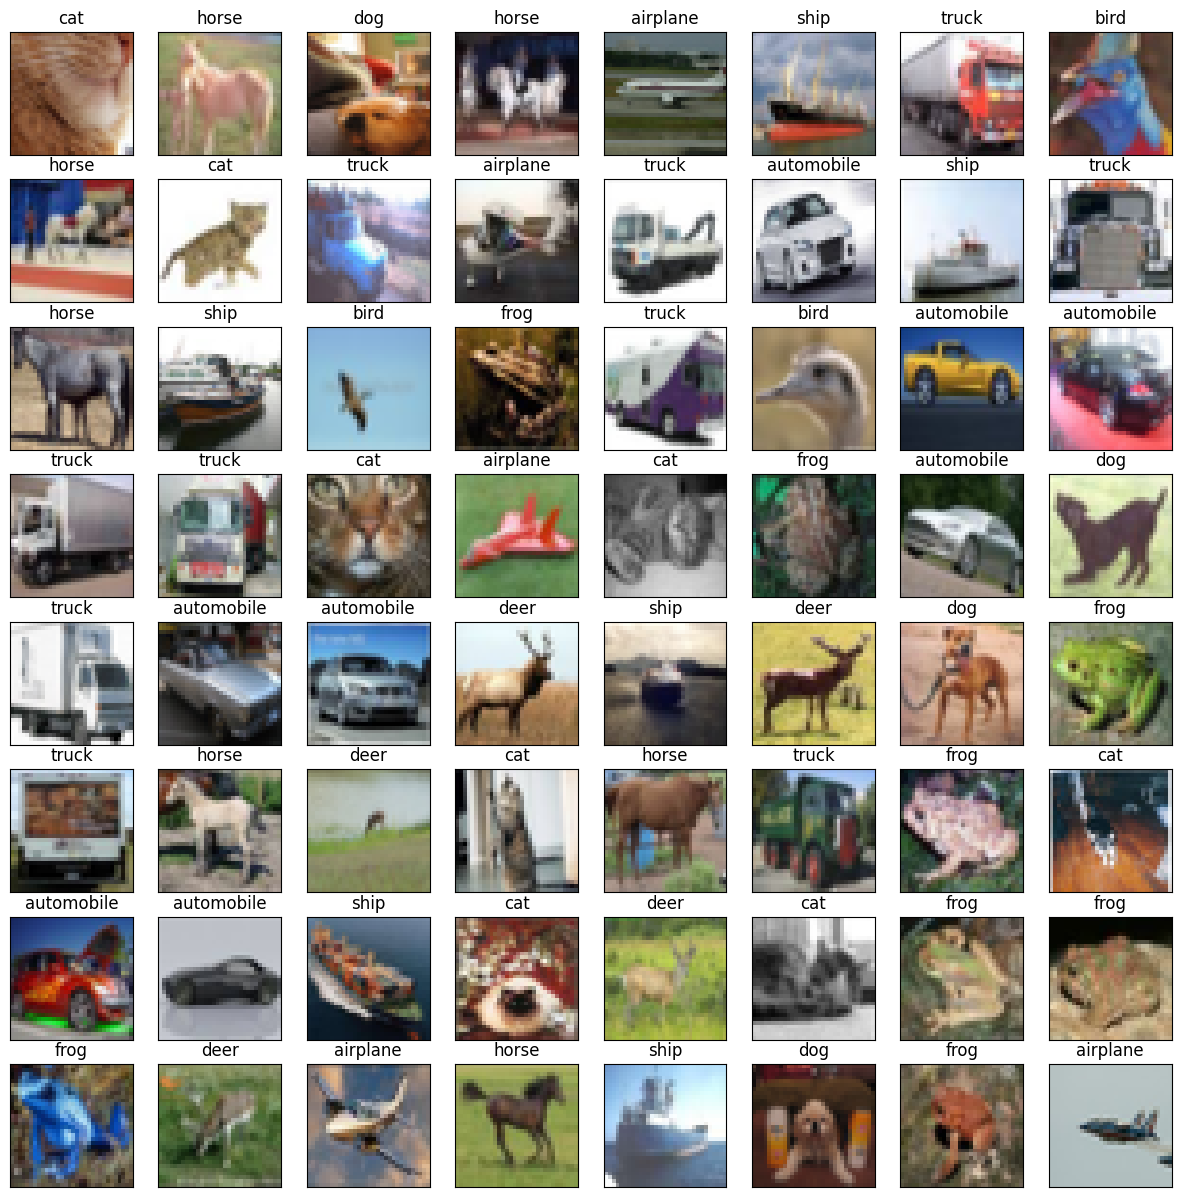

In [5]:
# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a new figure
plt.figure(figsize=(15,15))

# Loop over the first 25 images
for i in range(64):
    # Create a subplot for each image
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image
    plt.imshow(X_train[i])

    # Set the label as the title
    plt.title(class_names[y_train[i][0]], fontsize=12)

# Display the figure
plt.show()

**Data Preprocessing**
1.Normalization of Image Data
2.
One-Hot Encoding of Labels3.

Data Augmentation

**Normalization data**
convert the pixel values data type to float32 type, and then normalizes them by subtracting the mean and dividing by the standard deviation of the training set, enhancing the model's training efficiency and effectiveness:

In [6]:
# Convert pixel values data type to float32
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_valid = X_valid.astype('float32')

# Calculate the mean and standard deviation of the training images
mean = np.mean(X_train)
std  = np.std(X_train)

# Normalize the data
# The tiny value 1e-7 is added to prevent division by zero
X_train = (X_train-mean)/(std+1e-7)
X_test  = (X_test-mean) /(std+1e-7)
X_valid = (X_valid-mean)/(std+1e-7)




**One-Hot Encoding of Labels**

Convert the class labels to one-hot vectors to transform the categorical labels into a format suitable for multi-class classification by neural networks:

In [7]:
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test  = to_categorical(y_test, 10)

**Data Augmentation**

In [8]:
# Data augmentation
data_generator = ImageDataGenerator(
    # Rotate images randomly by up to 15 degrees
    rotation_range=15,

    # Shift images horizontally by up to 12% of their width
    width_shift_range=0.12,

    # Shift images vertically by up to 12% of their height
    height_shift_range=0.12,

    # Randomly flip images horizontally
    horizontal_flip=True,

    # Zoom images in by up to 10%
    zoom_range=0.1,

    # Change brightness by up to 10%
    brightness_range=[0.9,1.1],

    # Shear intensity (shear angle in counter-clockwise direction in degrees)
    shear_range=10,

    # Channel shift intensity
    channel_shift_range=0.1,
)

This code set up a pipeline for preprocessing the images during model training.The generator applies series of random transformations(specified by the parameters) to the each images each time they are loade into the model for training

Define CNN Model Architecture

In [9]:
#Initialize a sequential model
Model=Sequential()

#set the weight decay value for L2 regularization
weight_decay=0.0001

#Add the first convolution layer with 32 filters of size
Model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_regularizer=l2(weight_decay),input_shape=X_train.shape[1:]))

#Add batch normalization
Model.add(BatchNormalization())

# Add the second convolutional layer similar to the first
Model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))

Model.add(BatchNormalization())

# Add the first max pooling layer with pool size of 2x2
Model.add(MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer with 0.2 dropout rate
Model.add(Dropout(rate=0.2))

Model.add(Conv2D(filters=64,kernel_size=(3,3),padding=('same'),activation='relu',kernel_regularizer=l2(weight_decay)))
Model.add(BatchNormalization())

# Add the second max pooling layer and increase dropout rate to 0.3
Model.add(MaxPooling2D(pool_size=(2, 2)))
Model.add(Dropout(rate=0.3))

# Add the fifth and sixth convolutional layers with 128 filters
Model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
Model.add(BatchNormalization())

# Add the third max pooling layer and increase dropout rate to 0.4
Model.add(MaxPooling2D(pool_size=(2, 2)))
Model.add(Dropout(rate=0.4))

# Add the seventh and eighth convolutional layers with 256 filters
Model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
Model.add(BatchNormalization())
Model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
Model.add(BatchNormalization())

# Add the fourth max pooling layer and increase dropout rate to 0.5
Model.add(MaxPooling2D(pool_size=(2, 2)))
Model.add(Dropout(rate=0.5))

# Flatten the tensor output from the previous layer
Model.add(Flatten())

# Add a fully connected layer with softmax activation function for outputting class probabilities
Model.add(Dense(10, activation='softmax'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
Model.summary()#Display the detailed architecture of the model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,001,066 (3.82 MB)

 Trainable params: 999,530 (3.81 MB)

 Non-trainable params: 1,536 (6.00 KB)

Train the CNN Model

In [15]:
#Set the batch size for the training
batch_size=64

#Set the maximum number of epochs for the training
epochs=50

#Define the optimizer(Adam)
optimizer=Adam(learning_rate=0.0005)

#Compile the model with the defined optimizer,loss function, and metrics
Model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

# Add ReduceLROnPlateau callback
# Here, the learning rate will be reduced by half (factor=0.5) if no improvement in validation loss is observed for 10 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

# Add EarlyStopping callback
# Here, training will be stopped if no improvement in validation loss is observed for 40 epochs.
# The `restore_best_weights` parameter ensures that the model weights are reset to the values from the epoch
# with the best value of the monitored quantity (in this case, 'val_loss').
early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)

Model.fit(data_generator.flow(X_train, y_train, batch_size=batch_size),
          epochs=epochs,
          validation_data=(X_valid, y_valid),
          callbacks=[reduce_lr, early_stopping],
          verbose=2)

Epoch 1/50


KeyboardInterrupt: 

Visualizing the learning curves

In [ ]:
plt.figure(figsize=(15,6))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(model.history.history['loss'], label='Train Loss', color='#8502d1')
plt.plot(model.history.history['val_loss'], label='Validation Loss', color='darkorange')
plt.legend()
plt.title('Loss Evolution')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model.history.history['accuracy'], label='Train Accuracy', color='#8502d1')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()


Evaluating the Optimal Model on Test Data

In [ ]:
# Use the model to make predictions, evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)

In [ ]:
# Fetch the raw image from GitHub
url = "https://raw.githubusercontent.com/FarzadNekouee/Keras-CIFAR10-CNN-Model/master/truck_sample.png"
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
# Display the image
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [ ]:
# Resize it to 32x32 pixels
image = cv2.resize(image, (32,32))

# Normalize the image
image = (image-mean)/(std+1e-7)

# Add an extra dimension because the model expects a batch of images
image = image.reshape((1, 32, 32, 3))

In [ ]:
prediction = model.predict(image)

In [ ]:
predicted_class = prediction.argmax()

print('Predicted class: ', class_names[predicted_class])